In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import autograd
import wandb

In [27]:
import sdv
import synthcity

ModuleNotFoundError: No module named 'synthcity'

In [ ]:
!pip @ git+https://github.com/mihaela-stoian/ConstrainedDGM.git

In [25]:
!pip install sdv
!pip install synthcity

  Using cached synthcity-0.2.10-py3-none-any.whl (428 kB)
  Using cached lifelines-0.27.7-py3-none-any.whl (409 kB)


ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


  Using cached decaf_synthetic_data-0.1.6-py3-none-any.whl (9.1 kB)
  Using cached fflows-0.0.3-py3-none-any.whl (19 kB)
  Using cached pykeops-2.2.2-py3-none-any.whl
  Using cached xgbse-0.2.3-py3-none-any.whl (35 kB)
  Using cached nflows-0.14-py3-none-any.whl
  Using cached arfpy-0.1.1-py3-none-any.whl
  Using cached xgboost-1.7.6-py3-none-win_amd64.whl (70.9 MB)
  Using cached be_great-0.0.7-py3-none-any.whl (16 kB)
  Using cached loguru-0.7.2-py3-none-any.whl (62 kB)
  Using cached tsai-0.3.9-py3-none-any.whl (324 kB)
  Using cached geomloss-0.2.6-py3-none-any.whl
  Using cached pycox-0.2.3-py3-none-any.whl (73 kB)
  Using cached monai-1.3.0-202310121228-py3-none-any.whl (1.3 MB)
  Using cached optuna-3.5.0-py3-none-any.whl (413 kB)
  Using cached opacus-1.4.1-py3-none-any.whl (226 kB)
  Using cached accelerate-0.27.2-py3-none-any.whl (279 kB)
  Using cached datasets-2.18.0-py3-none-any.whl (510 kB)
  Using cached transformers-4.38.2-py3-none-any.whl (8.5 MB)
  Using cached safete

In [144]:
wids = pd.read_csv(r"C:\Users\yyyfa\ConstrainedDGM\data\heloc\train_data.csv")
wids.head(8)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80
5,Bad,59,137,11,78,31,0,0,91,1,...,47,0,0,0,62,93,12,4,3,94
6,Good,54,88,7,37,25,0,0,92,9,...,58,0,4,4,89,76,7,7,2,100
7,Good,68,148,7,65,17,0,0,83,31,...,44,0,0,0,28,48,2,2,2,40


In [83]:
import pandas as pd

def check_csv(csv_file):
    try:
        # Read the CSV file
        df = pd.read_csv(csv_file)

        # Check data types of all columns
        print("Data types of columns:")
        print(df.dtypes)

        # Check for any missing values
        print("\nMissing values:")
        print(df.isnull().sum())

        # Check for any string formatting issues
        print("\nString formatting issues:")
        for col in df.columns:
            try:
                # Attempt to format each column as string
                df[col].apply(lambda x: "%s" % x)
            except Exception as e:
                print(f"Column '{col}' raised an exception: {str(e)}")

        print("\nCSV file check complete.")

    except Exception as e:
        print(f"Error reading CSV file: {str(e)}")

if __name__ == "__main__":
    # Replace 'your_csv_file.csv' with the path to your CSV file
    csv_file = r"C:\Users\yyyfa\ConstrainedDGM\data\heloc\train_data.csv"
    check_csv(csv_file)


Data types of columns:
RiskPerformance                       object
ExternalRiskEstimate                   int64
MSinceOldestTradeOpen                  int64
MSinceMostRecentTradeOpen              int64
AverageMInFile                         int64
NumSatisfactoryTrades                  int64
NumTrades60Ever2DerogPubRec            int64
NumTrades90Ever2DerogPubRec            int64
PercentTradesNeverDelq                 int64
MSinceMostRecentDelq                   int64
MaxDelq2PublicRecLast12M               int64
MaxDelqEver                            int64
NumTotalTrades                         int64
NumTradesOpeninLast12M                 int64
PercentInstallTrades                   int64
MSinceMostRecentInqexcl7days           int64
NumInqLast6M                           int64
NumInqLast6Mexcl7days                  int64
NetFractionRevolvingBurden             int64
NetFractionInstallBurden               int64
NumRevolvingTradesWBalance             int64
NumInstallTradesWBalance        

In [79]:
wids.isna().sum()

RiskPerformance                       0
ExternalRiskEstimate                  0
MSinceOldestTradeOpen                 0
MSinceMostRecentTradeOpen             0
AverageMInFile                        0
NumSatisfactoryTrades                 0
NumTrades60Ever2DerogPubRec           0
NumTrades90Ever2DerogPubRec           0
PercentTradesNeverDelq                0
MSinceMostRecentDelq                  0
MaxDelq2PublicRecLast12M              0
MaxDelqEver                           0
NumTotalTrades                        0
NumTradesOpeninLast12M                0
PercentInstallTrades                  0
MSinceMostRecentInqexcl7days          0
NumInqLast6M                          0
NumInqLast6Mexcl7days                 0
NetFractionRevolvingBurden            0
NetFractionInstallBurden              0
NumRevolvingTradesWBalance            0
NumInstallTradesWBalance              0
NumBank2NatlTradesWHighUtilization    0
PercentTradesWBalance                 0
dtype: int64

In [145]:
wids['RiskPerformance'] = wids['RiskPerformance'].astype(str)

In [108]:
wids

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,Good,73,131,5,57,21,0,0,95,80,...,19,7,0,0,26,-8,5,2,0,100
10455,Bad,65,147,39,68,11,0,0,92,28,...,42,1,1,1,86,53,2,2,1,80
10456,Bad,74,129,6,64,18,1,1,100,-7,...,33,3,4,4,6,-8,5,-8,0,56
10457,Bad,72,234,12,113,42,2,2,96,35,...,20,6,0,0,19,-8,4,1,0,38


In [104]:
pip install --upgrade pandas

  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
Note: you may need to restart the kernel to use updated packages.


In [147]:
pd.DataFrame(wids).to_excel(r"C:\Users\yyyfa\ConstrainedDGM\data\heloc\ne.xlsx", index=False)

In [148]:
import openpyxl
import csv

wb = openpyxl.load_workbook(r"C:\Users\yyyfa\ConstrainedDGM\data\heloc\ne.xlsx")
sh = wb.active # was .get_active_sheet()
with open(r"C:\Users\yyyfa\ConstrainedDGM\data\heloc\ne.csv", 'w', newline="") as file_handle:
    csv_writer = csv.writer(file_handle)
    for row in sh.iter_rows(): # generator; was sh.rows
        csv_writer.writerow([cell.value for cell in row])

In [129]:
import openpyxl
import csv

wb = openpyxl.load_workbook(r"ne.xlsx")
sh = wb.active
with open(r"ne.xlsx", 'wb') as f:  # open('test.csv', 'w', newline="") for python 3
    c = csv.writer(f)
    for r in sh.rows:
        c.writerow([cell.value for cell in r])

BadZipFile: File is not a zip file

In [123]:
df = pd.read_excel(r"C:\Users\yyyfa\ConstrainedDGM\data\heloc\ne.xlsx")  # sheet_name is optional
df.to_csv('output_file_name.csv', index=False)  # index=False prevents pandas from writing a row index to the CSV.


TypeError: __init__() got an unexpected keyword argument 'line_terminator'

In [152]:
import pandas as pd
df = pd.DataFrame(wids)
df.to_csv("test")
#.to_csv(r"C:\Users\yyyfa\ConstrainedDGM\data\heloc\ne.csv", index=False, sep=",")  

TypeError: __init__() got an unexpected keyword argument 'line_terminator'

In [100]:
wids[0:10]

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80
5,Bad,59,137,11,78,31,0,0,91,1,...,47,0,0,0,62,93,12,4,3,94
6,Good,54,88,7,37,25,0,0,92,9,...,58,0,4,4,89,76,7,7,2,100
7,Good,68,148,7,65,17,0,0,83,31,...,44,0,0,0,28,48,2,2,2,40
8,Bad,59,324,2,138,24,0,0,85,5,...,26,0,1,1,68,-8,7,1,3,90
9,Bad,61,79,4,36,19,0,0,95,5,...,26,0,6,6,31,86,5,3,1,62


In [109]:
wids[0:10].to_csv('out.csv', index=False)

TypeError: __init__() got an unexpected keyword argument 'line_terminator'

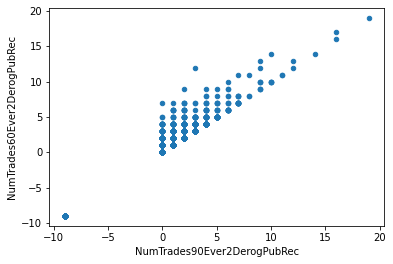

In [77]:
wids.plot.scatter(x='NumTrades90Ever2DerogPubRec',y='NumTrades60Ever2DerogPubRec');


In [71]:
import logging

import pandas as pd
import rdt

LOGGER = logging.getLogger(__name__)


class Baseline:
    """Base class for all the ``SDGym`` baselines."""

    MODALITIES = ()

    @classmethod
    def get_subclasses(cls, include_parents=False):
        """Recursively find subclasses of this Baseline.

        Args:
            include_parents (bool):
                Whether to include subclasses which are parents to
                other classes. Defaults to ``False``.
        """
        subclasses = dict()
        for child in cls.__subclasses__():
            grandchildren = child.get_subclasses(include_parents)
            subclasses.update(grandchildren)
            if include_parents or not grandchildren:
                subclasses[child.__name__] = child

        return subclasses

    def fit_sample(self, real_data, metadata):
        pass


class SingleTableBaseline(Baseline):
    """Base class for all the SingleTable Baselines.

    Sublcasses can choose to implement ``_fit_sample``, which will
    always be called with DataFrames and Table metadata dicts, or
    to overwrite the ``fit_sample`` method, which may be called with
    either DataFrames and Table dicts, or with dicts of tables and
    dataset metadata dicts.
    """

    MODALITIES = ('single-table', )

    def fit_sample(self, real_data, metadata):
        if isinstance(real_data, dict):
            return {
                table_name: self._fit_sample(table, metadata.get_table_meta(table_name))
                for table_name, table in real_data.items()
            }

        return self._fit_sample(real_data, metadata)


class LegacySingleTableBaseline(SingleTableBaseline):
    """Single table baseline which passes ordinals and categoricals down.

    This class exists here to support the legacy baselines which do not operate
    on metadata and instead expect lists of categorical and ordinal columns.
    """

    MODALITIES = ('single-table', )

    def _get_columns(self, real_data, table_metadata):
        model_columns = []
        categorical_columns = []

        fields_meta = table_metadata['fields']

        for column in real_data.columns:
            field_meta = fields_meta[column]
            field_type = field_meta['type']
            if field_type == 'id':
                continue

            index = len(model_columns)
            if field_type == 'categorical':
                categorical_columns.append(index)

            model_columns.append(column)

        return model_columns, categorical_columns

    def _fit_sample(self, real_data, table_metadata):
        columns, categoricals = self._get_columns(real_data, table_metadata)

        ht = rdt.HyperTransformer(dtype_transformers={
            'O': 'label_encoding',
        })
        model_data = ht.fit_transform(real_data[columns])

        LOGGER.info("Fitting %s", self.__class__.__name__)
        self.fit(model_data.to_numpy(), categoricals, ())

        LOGGER.info("Sampling %s", self.__class__.__name__)
        sampled_data = self.sample(len(model_data))
        sampled_data = pd.DataFrame(sampled_data, columns=columns)

        synthetic_data = real_data.copy()
        synthetic_data.update(ht.reverse_transform(sampled_data))
        return synthetic_data

ImportError: DLL load failed while importing lapack_lite: Не найден указанный модуль.

In [32]:
from setuptools import setup, find_packages

setup(
    name='synthesizers',
    version='0.1',
    packages=find_packages(),
    include_package_data=True,
    install_requires=[
        'sdv',
        'autograd',
        'wandb',
        'synthcity'
    ],
    url='https://github.com/mihaela-stoian/ConstrainedDGM/tree/main',
    classifiers=[
        'Development Status :: 3 - Alpha',
        'Intended Audience :: Developers',
        'License :: OSI Approved :: MIT License',
        'Programming Language :: Python :: 3',
        'Programming Language :: Python :: 3.7',
        'Programming Language :: Python :: 3.8',
        'Programming Language :: Python :: 3.9',
    ],
)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\Python\lib\distutils\fancy_getopt.py", line 233, in getopt
    opts, args = getopt.getopt(args, short_opts, self.long_opts)
  File "D:\Python\lib\getopt.py", line 95, in getopt
    opts, args = do_shorts(opts, args[0][1:], shortopts, args[1:])
  File "D:\Python\lib\getopt.py", line 195, in do_shorts
    if short_has_arg(opt, shortopts):
  File "D:\Python\lib\getopt.py", line 211, in short_has_arg
    raise GetoptError(_('option -%s not recognized') % opt, opt)
getopt.GetoptError: option -f not recognized

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\Python\lib\distutils\core.py", line 134, in setup
    ok = dist.parse_command_line()
  File "D:\Python\lib\distutils\dist.py", line 475, in parse_command_line
    args = parser.getopt(args=self.script_args, object=self)
  File "D:\Python\lib\distutils\fancy_getopt.py", line 235, in getopt
    raise DistutilsArgError(msg)
distu

TypeError: object of type 'NoneType' has no len()

In [64]:
pip install C:\Users\yyyfa\ConstrainedDGM\synthetizers\TableGAN\.

ERROR: Invalid requirement: 'rC:\\Users\\yyyfa\\ConstrainedDGM\\synthetizers\\TableGAN\\.'
Hint: It looks like a path. File 'rC:\Users\yyyfa\ConstrainedDGM\synthetizers\TableGAN\.' does not exist.


In [70]:
help(synthetizers.TableGAN.base_tableGAN)

AttributeError: module 'synthetizers.TableGAN' has no attribute 'base_tableGAN'

In [65]:
 import synthetizers

In [ ]:
from synthetizers.TableGAN.base_tableGAN import LegacySingleTableBaseline


In [62]:
synthetizers.TableGAN

<module 'synthetizers.TableGAN' from 'D:\\диплом\\task 1\\ConstrainedDGM\\synthetizers\\TableGAN\\__init__.py'>

In [60]:
import synthetizers.TableGAN

In [51]:
from synthetizers import LegacySingleTableBaseline

ImportError: cannot import name 'LegacySingleTableBaseline' from 'synthetizers' (unknown location)

In [45]:

use_case="url"
eps=300
default_optimiser="adam"
default_lr=0.0010
default_bs=128
default_random_dim=100
seed=0

# unconstrained
!python main_tableGAN.py ${use_case} --seed=$seed --epochs=$eps --optimiser=${default_optimiser} --lr=${default_lr} --batch_size=${default_bs} --random_dim=${default_random_dim}

# constrained
!python main_tableGAN.py ${use_case} --seed=$seed --epochs=$eps --optimiser=${default_optimiser} --lr=${default_lr} --batch_size=${default_bs} --random_dim=${default_random_dim} --version="constrained" --label_ordering="corr"

Traceback (most recent call last):
  File "D:\диплом\task 1\ConstrainedDGM\main_tableGAN.py", line 13, in <module>
    from evaluation.eval import eval_synthetic_data, sdv_eval_synthetic_data, constraints_sat_check
  File "D:\диплом\task 1\ConstrainedDGM\evaluation\eval.py", line 12, in <module>
    from evaluation.constraints import constraint_satisfaction
  File "D:\диплом\task 1\ConstrainedDGM\evaluation\constraints.py", line 6, in <module>
    from constraints.news import evaluate_numpy_news
  File "D:\диплом\task 1\ConstrainedDGM\constraints\news.py", line 5, in <module>
    INFINITY = np.int32(1e16)
OverflowError: Python int too large to convert to C long
Traceback (most recent call last):
  File "D:\диплом\task 1\ConstrainedDGM\main_tableGAN.py", line 13, in <module>
    from evaluation.eval import eval_synthetic_data, sdv_eval_synthetic_data, constraints_sat_check
  File "D:\диплом\task 1\ConstrainedDGM\evaluation\eval.py", line 12, in <module>
    from evaluation.constraints i

In [38]:
from sys import path
path += []
path

['C:\\Users\\yyyfa\\07.03 Task 1',
 'D:\\Python\\python39.zip',
 'D:\\Python\\DLLs',
 'D:\\Python\\lib',
 'D:\\Python',
 '',
 'D:\\Python\\lib\\site-packages',
 'D:\\Python\\lib\\site-packages\\locket-0.2.1-py3.9.egg',
 'D:\\Python\\lib\\site-packages\\win32',
 'D:\\Python\\lib\\site-packages\\win32\\lib',
 'D:\\Python\\lib\\site-packages\\Pythonwin',
 'D:\\Python\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\yyyfa\\.ipython']

In [37]:
import os
os.chdir(r"D:\диплом\task 1\ConstrainedDGM")

In [41]:
import os

# Define the directory structure
directories = [
    'synthetizers/CTGAN',
    'synthetizers/TVAE',
    'synthetizers/TableGAN'
]

# Create directories
for directory in directories:
    os.makedirs(directory, exist_ok=True)

# Optionally, create placeholder files or add code to each folder
for directory in directories:
    # Create a placeholder file in each directory
    placeholder_file = os.path.join(directory, 'placeholder.txt')
    with open(placeholder_file, 'w') as f:
        f.write('This is a placeholder file.')

# Display the directory structure
def display_directory_structure(directory):
    for root, dirs, files in os.walk(directory):
        level = root.replace(directory, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f"{indent}{os.path.basename(root)}/")
        sub_indent = ' ' * 4 * (level + 1)
        for file in files:
            print(f"{sub_indent}{file}")

# Display the directory structure
print("Directory Structure:")
print("====================")
display_directory_structure('synthetizers')


Directory Structure:
synthetizers/
    CTGAN/
        base_ctgan.py
        ctgan.py
        placeholder.txt
    TableGAN/
        base_tableGAN.py
        placeholder.txt
        tableGAN.py
    TVAE/
        placeholder.txt
        tvae.py


In [42]:
from setuptools import setup, find_packages

setup(
    name='synthetizers',
    version='0.1',
    packages=find_packages(),  # Automatically find packages
    package_data={'': ['*.txt']},  # Include placeholder.txt files
    include_package_data=True,
    install_requires=[
        # Add your dependencies here
    ],
    author='Your Name',
    author_email='your.email@example.com',
    description='A Python package for synthesizers',
    url='https://github.com/yourusername/synthesizers',
    classifiers=[
        'Development Status :: 3 - Alpha',
        'Intended Audience :: Developers',
        'License :: OSI Approved :: MIT License',
        'Programming Language :: Python :: 3',
        'Programming Language :: Python :: 3.7',
        'Programming Language :: Python :: 3.8',
        'Programming Language :: Python :: 3.9',
    ],
)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\Python\lib\distutils\fancy_getopt.py", line 233, in getopt
    opts, args = getopt.getopt(args, short_opts, self.long_opts)
  File "D:\Python\lib\getopt.py", line 95, in getopt
    opts, args = do_shorts(opts, args[0][1:], shortopts, args[1:])
  File "D:\Python\lib\getopt.py", line 195, in do_shorts
    if short_has_arg(opt, shortopts):
  File "D:\Python\lib\getopt.py", line 211, in short_has_arg
    raise GetoptError(_('option -%s not recognized') % opt, opt)
getopt.GetoptError: option -f not recognized

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\Python\lib\distutils\core.py", line 134, in setup
    ok = dist.parse_command_line()
  File "D:\Python\lib\distutils\dist.py", line 475, in parse_command_line
    args = parser.getopt(args=self.script_args, object=self)
  File "D:\Python\lib\distutils\fancy_getopt.py", line 235, in getopt
    raise DistutilsArgError(msg)
distu

TypeError: object of type 'NoneType' has no len()

In [44]:
!pip install "D:\диплом\task 1\ConstrainedDGM\synthetizers\."

Processing d:\диплом\task 1\constraineddgm\synthetizers


  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
    ERROR: Command errored out with exit status 1:
     command: 'D:\Python\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\yyyfa\\AppData\\Local\\Temp\\pip-req-build-67k4wnj8\\setup.py'"'"'; __file__='"'"'C:\\Users\\yyyfa\\AppData\\Local\\Temp\\pip-req-build-67k4wnj8\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base '

In [73]:
import numpy as np
#from constraints.constraints_operator import apply_or
#from constraints.file_constraints import FileConstraints
INFINITY = np.int64(1e16)

In [ ]:
git clone https://github.com/mihaela-stoian/ConstrainedDGM.git

    
    
conda create -n cdgm python=3.10 ipython
conda activate cdgm
conda install pytorch torchvision torchaudio cpuonly -c pytorch
pip install sdv autograd wandb synthcity
    
    
    
cd ConstrainedDGM/synthetizers
    

In [ ]:
python main_tableGAN.py url --seed=0 --epochs=300 --optimiser=adam --lr=0.0010 --batch_size=128 --random_dim=100


In [ ]:
use_case="url"
eps=300
default_optimiser="adam"
default_lr=0.0010
default_bs=128
default_random_dim=100
seed=0

# unconstrained
python main_tableGAN.py heloc --seed=0 --epochs=200 --optimiser=adam --lr=0.0010 --batch_size=128 --random_dim=100

# constrained
python main_tableGAN.py ${use_case} --seed=$seed --epochs=$eps --optimiser=${default_optimiser} --lr=${default_lr} --batch_size=${default_bs} --random_dim=${default_random_dim} --version="constrained" --label_ordering="corr"